# Forecast Exploration Notebook
This notebooks on predicting future performance of the world economy and financial markets based on financial time sereis and the world events time series (generated by the NLP workstream).

## DeepAR

In [4]:
# pip install "gluonts[torch]"

In [5]:
# Importing the necessary packages 
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

/opt/conda/lib/python3.9/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Load data from a CSV file into a PandasDataset
file_name = "ts_data_lda_model_topics_5_passes_10_on_title_lemmatized_cnbc_news_dataset_processed.csv"
file_path = f"../../data_engineering/timeseries_data/{file_name}"

df = pd.read_csv(
    file_path,
    # parse_dates=True,
).rename(columns={'Unnamed: 0': 'Week'})
df['Week'] = df['Week'].apply(lambda x: datetime.fromisoformat(x))

df = df.set_index('Week')
df = df[['0']]
df.head()

,0
Week,
2006-12-04 00:00:00+00:00,0.864812
2006-12-11 00:00:00+00:00,0.033342
2006-12-18 00:00:00+00:00,0.000000
2006-12-25 00:00:00+00:00,0.086091
2007-01-01 00:00:00+00:00,0.000000


In the following cell the pandas dataframe is converted into a [Dataset](https://ts.gluon.ai/stable/api/gluonts/gluonts.dataset.pandas.html) which gives the data additional explicid structure.

In [ ]:
dataset = PandasDataset(
    df, 
    target="0", 
    freq='W',
    past_feat_dynamic_real=
)

In [23]:
# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-32)
test_data = test_gen.generate_instances(prediction_length=32, windows=1)

In [24]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=32, freq="W", trainer_kwargs={"max_epochs": 5}
).train(training_data)

forecasts = list(model.predict(test_data.input))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes | Out sizes   
----------------------------------------------------------------
0 | model | DeepARModel | 23.8 K | ?        | [1, 100, 32]
----------------------------------------------------------------
23.8 K    Trainable params
0         Non-trainable params
23.8 K    Total params
0.095     Total estimated model params size (MB)


Epoch 0: : 50it [00:04, 10.59it/s, v_num=3, train_loss=-.420]

Epoch 0, global step 50: 'train_loss' reached -0.42003 (best -0.42003), saving model to '/root/project_submission_haiperformer/modelling/exploration/lightning_logs/version_3/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: : 50it [00:04, 11.17it/s, v_num=3, train_loss=-.683]

Epoch 1, global step 100: 'train_loss' reached -0.68315 (best -0.68315), saving model to '/root/project_submission_haiperformer/modelling/exploration/lightning_logs/version_3/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: : 50it [00:04, 11.34it/s, v_num=3, train_loss=-.828]

Epoch 2, global step 150: 'train_loss' reached -0.82823 (best -0.82823), saving model to '/root/project_submission_haiperformer/modelling/exploration/lightning_logs/version_3/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: : 50it [00:04, 11.44it/s, v_num=3, train_loss=-.956]

Epoch 3, global step 200: 'train_loss' reached -0.95566 (best -0.95566), saving model to '/root/project_submission_haiperformer/modelling/exploration/lightning_logs/version_3/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: : 50it [00:04, 11.43it/s, v_num=3, train_loss=-1.18]

Epoch 4, global step 250: 'train_loss' reached -1.18172 (best -1.18172), saving model to '/root/project_submission_haiperformer/modelling/exploration/lightning_logs/version_3/checkpoints/epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: : 50it [00:04, 11.24it/s, v_num=3, train_loss=-1.18]


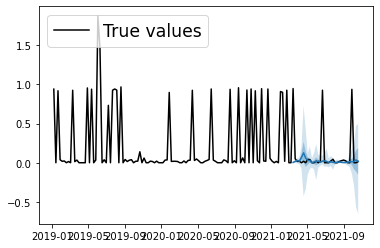

In [26]:
# Plot predictions
plt.plot(df["2019":], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")